In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

np.set_printoptions(suppress=True) # Suppress scientific notation where possible

from imblearn.over_sampling import SMOTE


from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

# use grid search cv to select model hyperparameters for each model, then use ROC curve comparison to choose model with highest AUC?

In [2]:
# to open pickled data

with open("MVP_patientlevel_intubation.pkl", 'rb') as picklefile: 
    patients = pickle.load(picklefile)

patients.head()

,id,Age,Patient_Gender,Pneumonia,Pregnant,Indigenous,Diabetic,COPD_Lung_Disease,Asthma,Immunosuppressed,Hypertension,Comorbidity,Cardiovascular_Disease,Obese,Chronic_Renal_Insufficiency,Intensive_Care,Intubation
0,35483,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7062,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,13779,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17334,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2789,64,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [3]:
patients = patients[['id', 'Age', 'Patient_Gender', 'Pneumonia', 'Pregnant', 'Indigenous',
       'Diabetic', 'COPD_Lung_Disease', 'Asthma', 'Immunosuppressed',
       'Hypertension', 'Comorbidity', 'Cardiovascular_Disease', 'Obese',
       'Chronic_Renal_Insufficiency', 'Intensive_Care', 'Intubation']]

In [4]:
with open('MVP_patientlevel_intubation.pkl', 'wb') as picklefile:
    pickle.dump(patients, picklefile)

In [5]:
patients.shape

(98820, 17)

In [6]:
patients.Intubation.value_counts()

0    96726
1     2094
Name: Intubation, dtype: int64

In [7]:
X = patients.drop(['id'], axis=1)
y = patients['Intubation']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train = X_train_val.copy()
X_train['Intubation'] = y_train_val

In [9]:
sns.pairplot(X_train, hue='Intubation');

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7feb2232fca0> (for post_execute):


KeyboardInterrupt: 

ValueError: cannot reshape array of size 16 into shape (2,6)

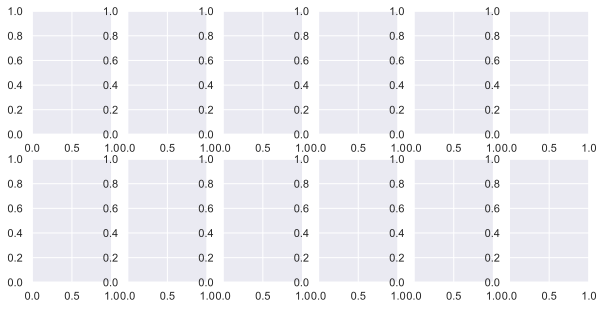

In [10]:
"""f, axes = plt.subplots(2, 6)
f.set_size_inches(10, 5)
cols = np.array(X_train_val.columns).reshape(2, 6)
for i in range(2):
    for j in range(6):       
        sns.boxplot(X_train[cols[i, j]], orient='v', ax=axes[i, j])
        """

<AxesSubplot:>

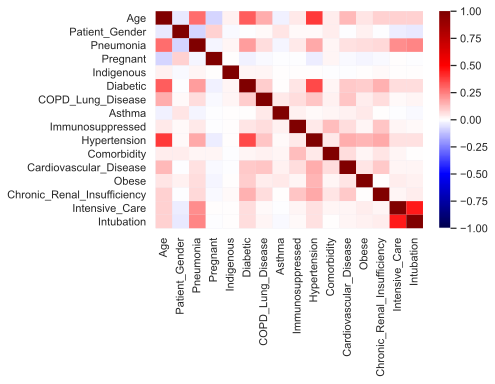

In [10]:
sns.heatmap(X_train.corr(), cmap='seismic', vmin=-1, vmax=1)

In [12]:
baseline_models = [
    ('Dummy', DummyClassifier(strategy="most_frequent")),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(random_state=0)),
]

NameError: name 'DummyClassifier' is not defined

In [ ]:
metrics = []
roc_auc = []
for estimator in baseline_models:
    metrics.append(fit_and_cross_validate_score_model(estimator, X_train_val_baseline, y_train_val_baseline))
    roc_auc.append(fit_and_cross_validate_score_roc_auc(estimator, X_train_val_baseline, y_train_val_baseline))

pd.DataFrame(metrics)